In [11]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob

# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM0/wrfout_d01_2020-06-27_00:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM1/wrfout_d01_2020-06-27_00:00:00")
ncfile2 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM2/wrfout_d01_2020-06-27_00:00:00")
ncfile3 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM3/wrfout_d01_2020-06-27_00:00:00")
#import numpy as np
#unique_lu = np.unique(to_np(getvar(ncfile1, "LU_INDEX")))
#print("Unique LU_INDEX values:", unique_lu)

# This is copied and pasted from the EPA CSV.
#State 06
#County 067
# Site Number 0015
# Parameter Code 62101	
#POC 1	
# Lat 38.593322	
# Long-121.503795	
#Datum WGS84
#Parameter Outdoor Temperature	
# Time 6/1/2020	0:00 - 6/30/2020 21:00
# Method Name Non-FRM	042	INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 2	
# California	Sacramento
TempC = (np.array([76,75,74,71,68,66,65,64,63,62,62,61,61,61,62,64,67,71,75,77,81,82,83,85,85,85,84,81,78,75,71,70,68,67,66,65,65,67,70,73,77,82,
                  85,88,90,92,94,95,95,95,94,90,85,80,76,75,75,74,73,72,71,72,74,77,81,85,90,93,96,97,99,100,100,100,97,92,87,83,78,76,76,76,74,
                  72,70,70,72,76,81,85,89,92,94,96,98,99,99,99,94,87,83,78,73,68,64,62,61,60,59,58,61,63,66,69,72,74,76,76,75,76,75,71,67,63,60,
                  59,58,57,57,56,56,56,55,55,56,59,63,68,71,74,76,76,77,76,76,74,72,66,64,63,61,60,58,57,56,55,54,54,57,60,63,65,66,68,69,71,72,
                  72,73,73,73,70,69,68,66,62,60,59,58,57,55,56,58,62,65,69,71,73,75,77,79,80,81,82,80,78,74,69,66,64,63,63,61,60,59,60,63,65,71,
                  76,79,83,85,87,89,90,90,91,89,83,79,75,72,70,69,69,68,67,65,66,67,70,75,80,84,87,89,93,94,95,95,95,92,86,80,76,73,71,69,68,65,
                  64,64,64,66,69,73,78,82,87,90,93,94,91,90,89,85,79,74,71,69,67,66,65,65,63,62,60,62,66,70,69,73,74,75,74,70,66,71,71,69,66,62,
                  60,58,57,57,57,57,57,57,56,58,60,63,65,67,69,72,73,73,74,74,74,72,68,65,63,62,60,60,59,59,58,58,57,59,63,67,71,74,76,78,80,82,
                  83,84,83,83,78,72,69,67,66,66,65,64,64,64,64,66,69,72,74,78,80,82,86,86,83,81,79,75,70,67,65,64,63,62,61,60,58,58,59,62,64,67,
                  70,72,74,76,78,80,80,81,81,79,75,72,70,68,67,67,64,64,64,64,64,65,67,71,73,76,79,81,83,85,87,87,87,86,83,79,77,74,71,68,67,65,
                  64,64,65,68,72,76,81,85,88,90,92,93,94,94,93,92,88,83,77,73,72,72,72,70,69,67,66,67,71,76,80,85,89,92,93,94,95,95,93,87,80,73,
                  69,67,66,64,62,61,60,59,59,61,64,67,71,75,78,83,86,88,90,89,87,82,76,72,68,67,66,65,65,64,63,63,64,66,69,73,77,82,88,90,92,94,
                  95,94,91,86,80,76,72,71,69,67,65,64,63,63,63,64,69,73,79,84,88,93,95,98,99,98,97,92,86,79,74,73,70,68,67,66,65,63,63,64,68,71,
                  76,81,86,90,93,96,97,94,92,87,79,74,71,68,66,65,64,63,62,61,61,64,67,71,76,81,85,89,93,95,96,97,94,91,86,80,77,74,72,71,69,67,
                  65,64,64,67,70,75,80,86,90,94,97,100,100,96,92,86,80,77,75,73,72,69,67,67,65,64,64,66,69,74,80,85,91,95,98,100,99,97,93,88,83,
                  79,75,72,69,67,66,65,64,62,63,65,69,73,76,79,82,85,84,84,84,83,81,76,70,66,63,61,60,60,59,59,58,58,58,60,62,66,68,72,74,77,78,
                  80,80,80,79,76,72,68,66,64,63,66,66,65,66,66,66,67,70,73,75,78,81,83,85,85,86,87,86,85,84,80,73,70,69,68,68,67,65,65,65,67,70,
                  74,79,83,86,89,91])-32)/1.8

## EPA Sensor Location
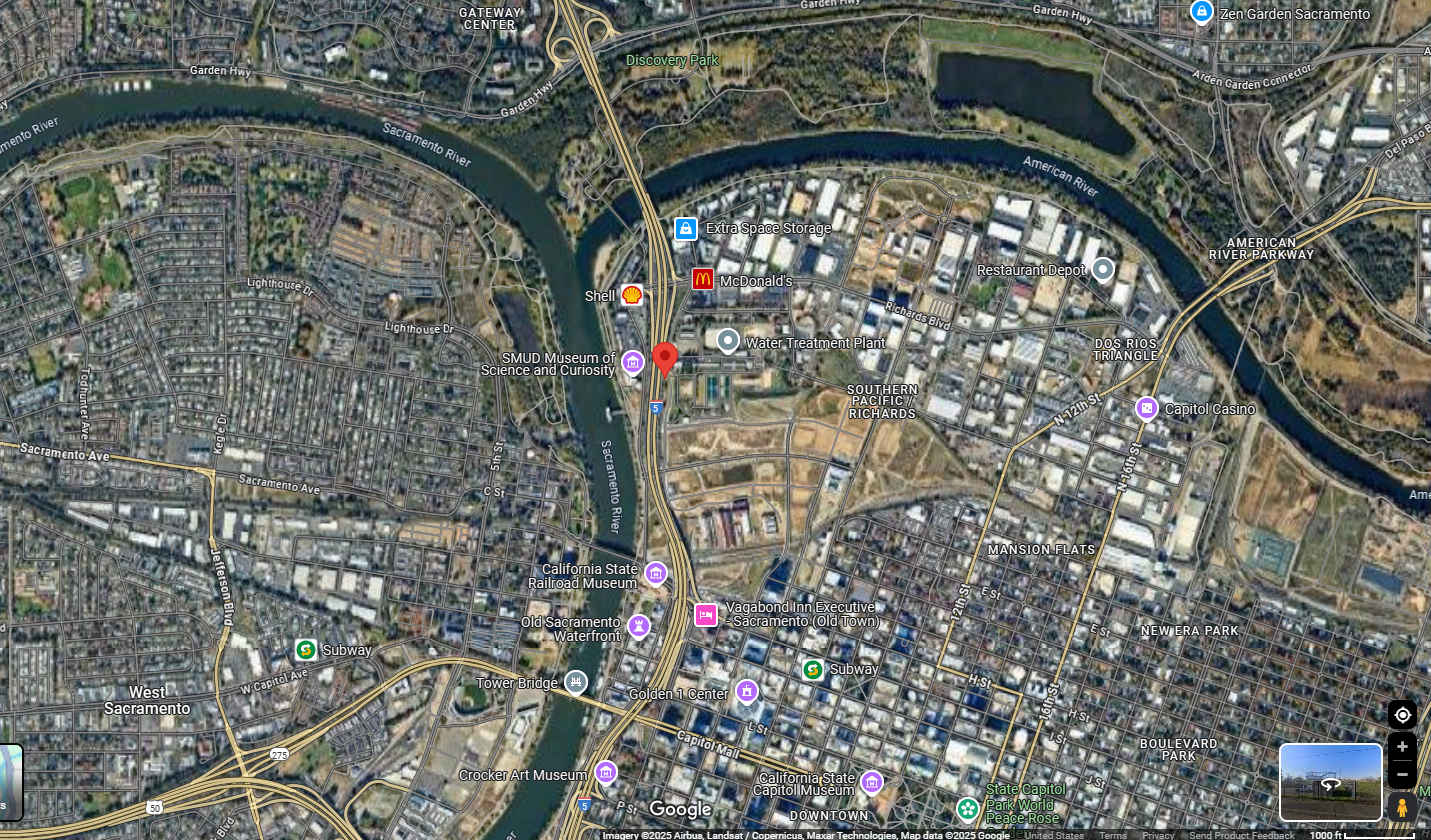
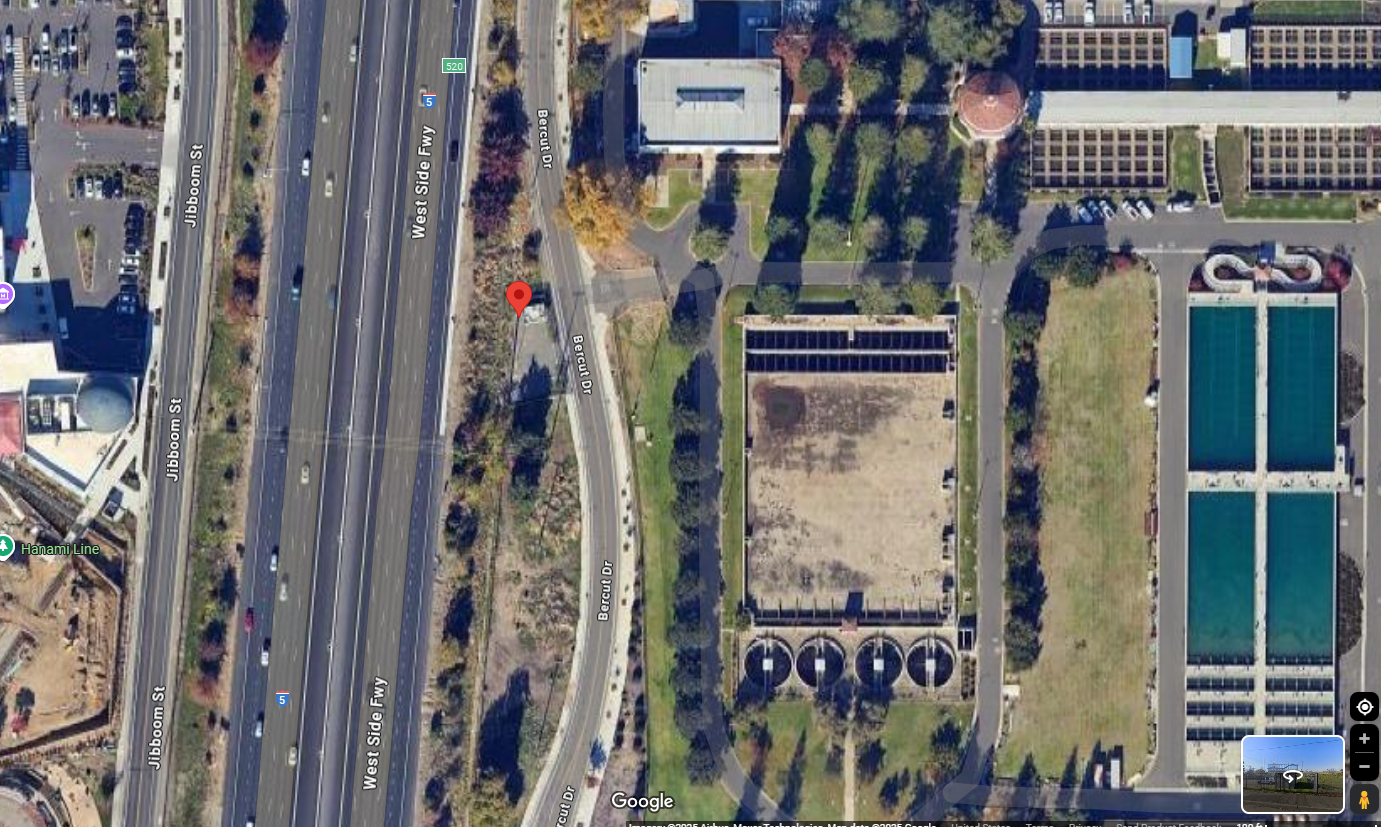

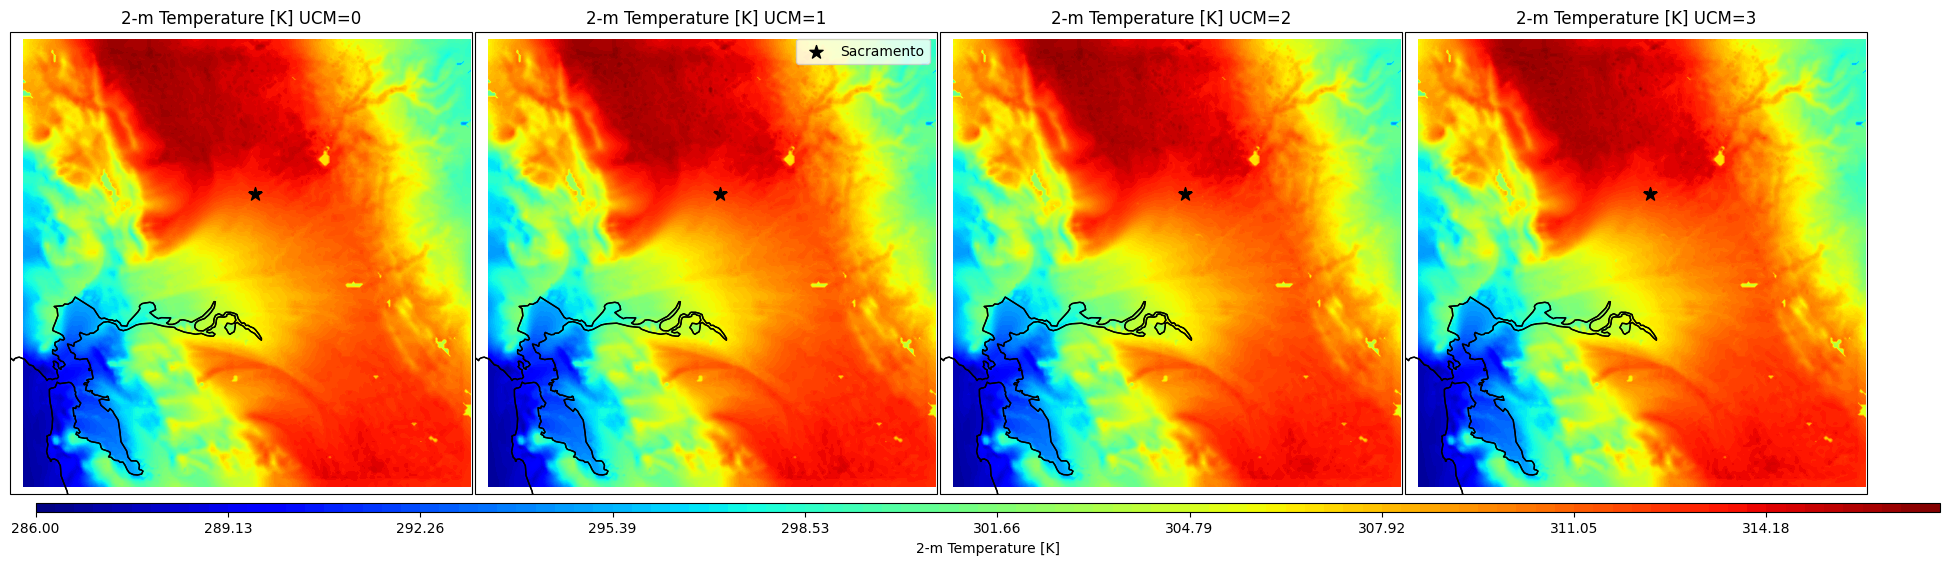

In [12]:
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")
Var3 = getvar(ncfile3, "T2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var2).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(), max(to_np(Var2).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("2-m Temperature [K] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("2-m Temperature [K] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
ax1.legend()

#  contour plot for UCM=2
ax2.set_title("2-m Temperature [K] UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("2-m Temperature [K] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax3.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("2-m Temperature [K]")

plt.show()

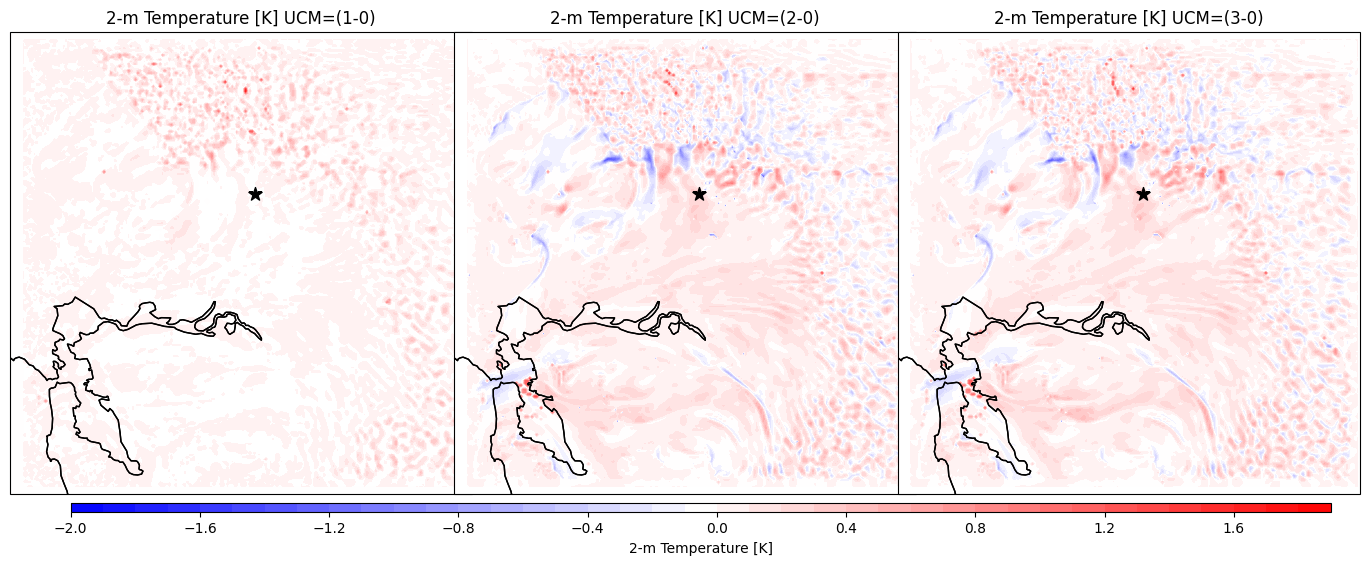

In [16]:
Var0 = getvar(ncfile0, "T2")
Var1 = getvar(ncfile1, "T2")
Var2 = getvar(ncfile2, "T2")
Var3 = getvar(ncfile3, "T2")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.arange(-2, 2, 0.1)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("2-m Temperature [K] UCM=(1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("2-m Temperature [K] UCM=(2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("2-m Temperature [K] UCM=(3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("2-m Temperature [K]")

plt.show()

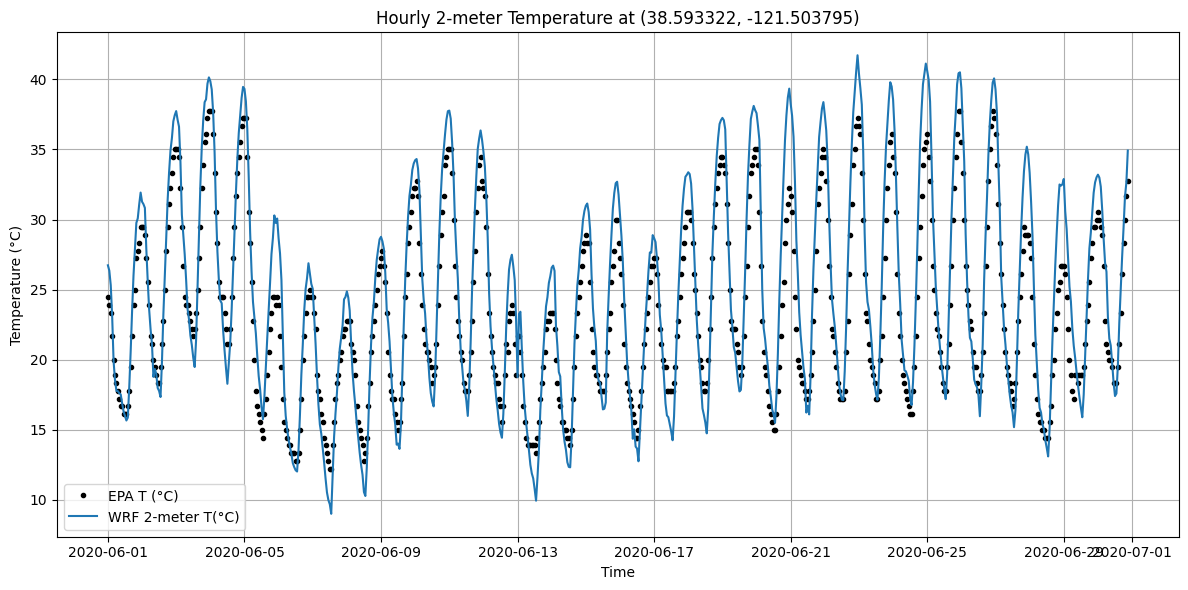

In [2]:
# === User-defined parameters ===
data_path = "/data/wto/WRF/WRFV4.5/test/em_real_UCM0/"  # Update if needed
file_pattern = "wrfout_d01_2020-06-*"
lat_point = 38.593322
lon_point = -121.503795

# === Load all WRF output files ===
files = sorted(glob(f"{data_path}/{file_pattern}"))

# === Use first file to find grid location ===
sample_ds = Dataset(files[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
t2_all = []
times = []

for file in files:
    ds_single = Dataset(file)
    t2 = getvar(ds_single, "T2", timeidx=ALL_TIMES)  # May return 2D or 3D

    # Handle time safely
    time_vals = t2.Time.values
    if np.isscalar(time_vals):
        times.append(time_vals)
    else:
        times.extend(time_vals)

    # Handle 2D or 3D arrays
    if t2.ndim == 3:
        t2_point = t2[:, y_idx, x_idx] - 273.15  # Multi-time step
    elif t2.ndim == 2:
        t2_point = [t2[y_idx, x_idx] - 273.15]   # Single time step
    else:
        raise ValueError("Unexpected dimensions for T2 variable")

    t2_all.extend(to_np(t2_point))

# === Plot ===
plt.figure(figsize=(12, 6))
plt.plot(times, TempC,'.k', label="EPA T (°C)")
plt.plot(times, t2_all, label="WRF 2-meter T(°C)")
plt.title("Hourly 2-meter Temperature at (38.593322, -121.503795)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
print(len(TempC))

718


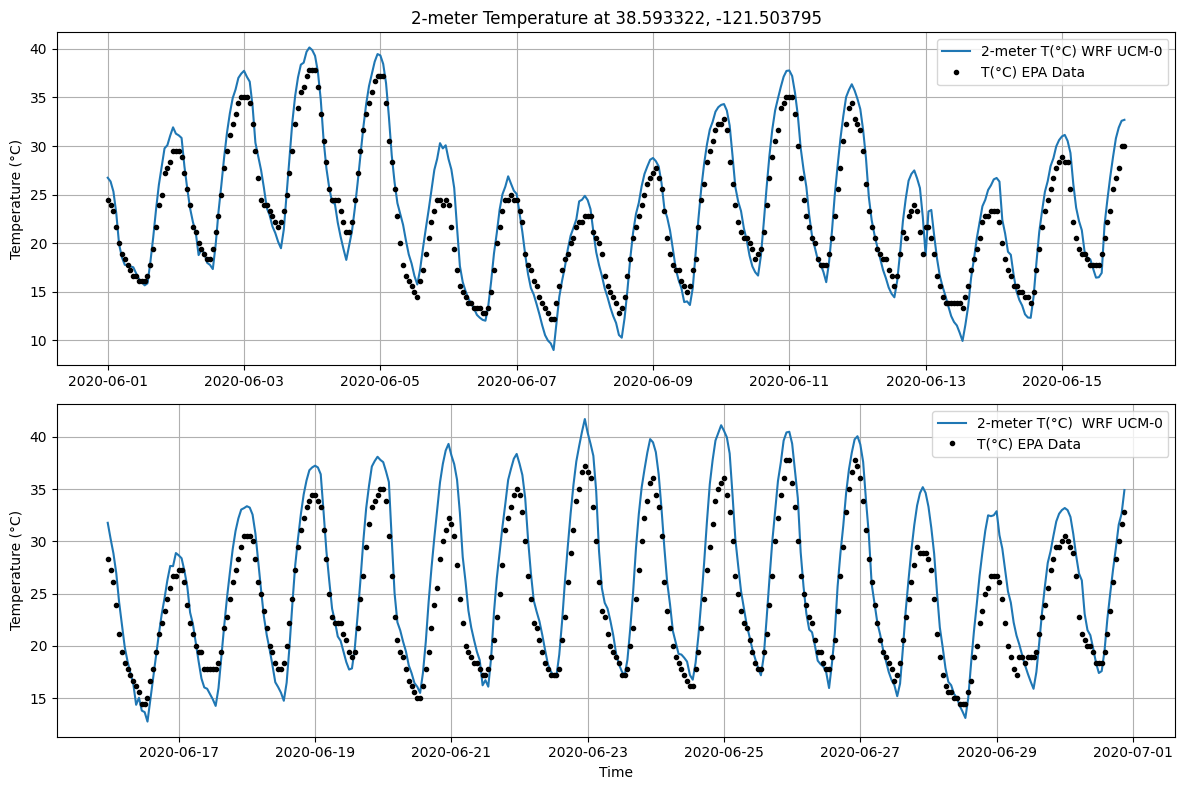

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, ll_to_xy, ALL_TIMES
from glob import glob

# === User-defined parameters ===
data_path = "/data/wto/WRF/WRFV4.5/test/em_real_UCM0/"  # Update if needed
file_pattern = "wrfout_d01_2020-06-*"
lat_point = 38.593322
lon_point = -121.503795

# === Load all WRF output files ===
files = sorted(glob(f"{data_path}/{file_pattern}"))

# === Use first file to find grid location ===
sample_ds = Dataset(files[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
t2_all_UCM0 = []
times = []

for file in files:
    ds_single = Dataset(file)
    t2 = getvar(ds_single, "T2", timeidx=ALL_TIMES)  # May return 2D or 3D

    # Handle time safely
    time_vals = t2.Time.values
    if np.isscalar(time_vals):
        times.append(time_vals)
    else:
        times.extend(time_vals)

    # Handle 2D or 3D arrays
    if t2.ndim == 3:
        t2_point = t2[:, y_idx, x_idx] - 273.15  # Multi-time step
    elif t2.ndim == 2:
        t2_point = [t2[y_idx, x_idx] - 273.15]   # Single time step
    else:
        raise ValueError("Unexpected dimensions for T2 variable")

    t2_all_UCM0.extend(to_np(t2_point))


fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Top subplot (first half)
axs[0].plot(times[0:359], t2_all_UCM0[0:359], label="2-meter T(°C) WRF UCM-0", color='tab:blue')
axs[0].plot(times[0:359], TempC[0:359], '.k', label="T(°C) EPA Data")
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_title("2-meter Temperature at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(times[359:718], t2_all_UCM0[359:718], label="2-meter T(°C)  WRF UCM-0", color='tab:blue')
axs[1].plot(times[359:718], TempC[359:718], '.k', label="T(°C) EPA Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature (°C)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

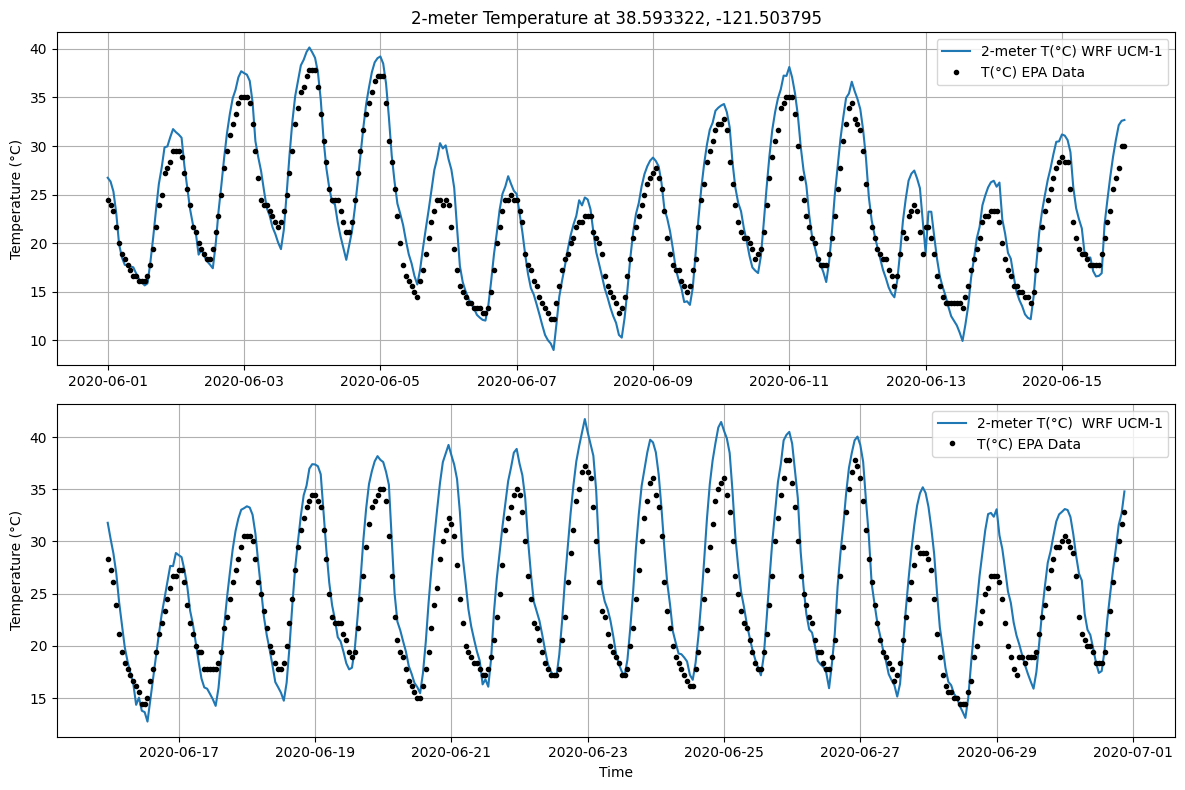

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, ll_to_xy, ALL_TIMES
from glob import glob

# === User-defined parameters ===
data_path = "/data/wto/WRF/WRFV4.5/test/em_real_UCM1/"  # Update if needed
file_pattern = "wrfout_d01_2020-06-*"
lat_point = 38.593322
lon_point = -121.503795

# === Load all WRF output files ===
files = sorted(glob(f"{data_path}/{file_pattern}"))

# === Use first file to find grid location ===
sample_ds = Dataset(files[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
t2_all_UCM1 = []
times = []

for file in files:
    ds_single = Dataset(file)
    t2 = getvar(ds_single, "T2", timeidx=ALL_TIMES)  # May return 2D or 3D

    # Handle time safely
    time_vals = t2.Time.values
    if np.isscalar(time_vals):
        times.append(time_vals)
    else:
        times.extend(time_vals)

    # Handle 2D or 3D arrays
    if t2.ndim == 3:
        t2_point = t2[:, y_idx, x_idx] - 273.15  # Multi-time step
    elif t2.ndim == 2:
        t2_point = [t2[y_idx, x_idx] - 273.15]   # Single time step
    else:
        raise ValueError("Unexpected dimensions for T2 variable")

    t2_all_UCM1.extend(to_np(t2_point))


fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Top subplot (first half)
axs[0].plot(times[0:359], t2_all_UCM1[0:359], label="2-meter T(°C) WRF UCM-1", color='tab:blue')
axs[0].plot(times[0:359], TempC[0:359], '.k', label="T(°C) EPA Data")
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_title("2-meter Temperature at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(times[359:718], t2_all_UCM1[359:718], label="2-meter T(°C)  WRF UCM-1", color='tab:blue')
axs[1].plot(times[359:718], TempC[359:718], '.k', label="T(°C) EPA Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature (°C)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

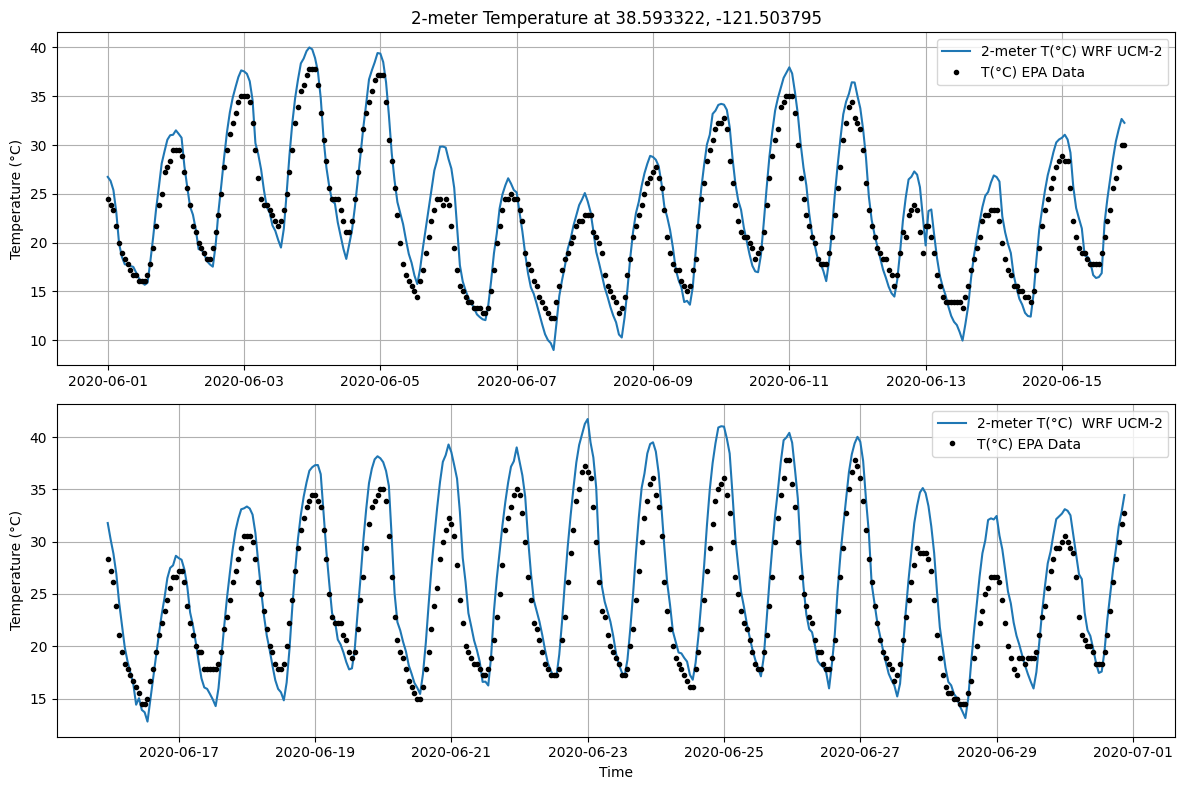

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, ll_to_xy, ALL_TIMES
from glob import glob

# === User-defined parameters ===
data_path = "/data/wto/WRF/WRFV4.5/test/em_real_UCM2/"  # Update if needed
file_pattern = "wrfout_d01_2020-06-*"
lat_point = 38.593322
lon_point = -121.503795

# === Load all WRF output files ===
files = sorted(glob(f"{data_path}/{file_pattern}"))

# === Use first file to find grid location ===
sample_ds = Dataset(files[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
t2_all_UCM2 = []
times = []

for file in files:
    ds_single = Dataset(file)
    t2 = getvar(ds_single, "T2", timeidx=ALL_TIMES)  # May return 2D or 3D

    # Handle time safely
    time_vals = t2.Time.values
    if np.isscalar(time_vals):
        times.append(time_vals)
    else:
        times.extend(time_vals)

    # Handle 2D or 3D arrays
    if t2.ndim == 3:
        t2_point = t2[:, y_idx, x_idx] - 273.15  # Multi-time step
    elif t2.ndim == 2:
        t2_point = [t2[y_idx, x_idx] - 273.15]   # Single time step
    else:
        raise ValueError("Unexpected dimensions for T2 variable")

    t2_all_UCM2.extend(to_np(t2_point))


fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Top subplot (first half)
axs[0].plot(times[0:359], t2_all_UCM2[0:359], label="2-meter T(°C) WRF UCM-2", color='tab:blue')
axs[0].plot(times[0:359], TempC[0:359], '.k', label="T(°C) EPA Data")
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_title("2-meter Temperature at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(times[359:718], t2_all_UCM2[359:718], label="2-meter T(°C)  WRF UCM-2", color='tab:blue')
axs[1].plot(times[359:718], TempC[359:718], '.k', label="T(°C) EPA Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature (°C)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

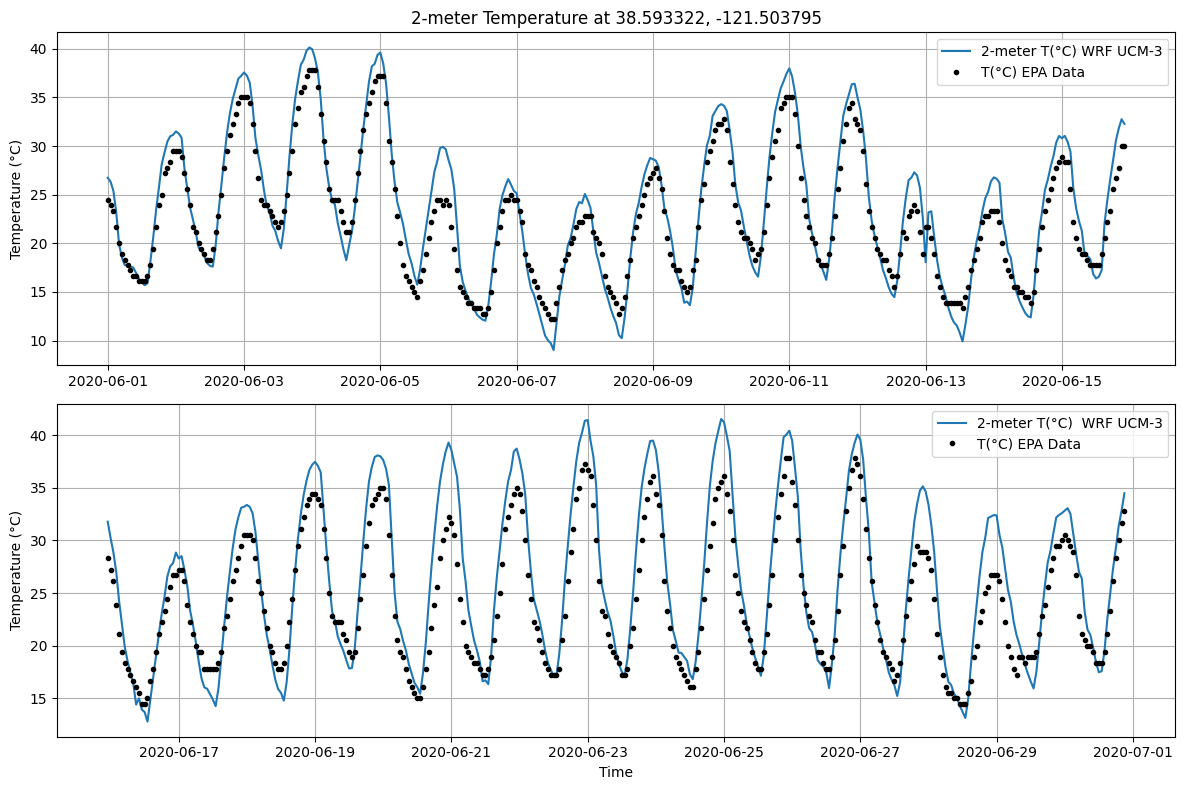

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, ll_to_xy, ALL_TIMES
from glob import glob

# === User-defined parameters ===
data_path = "/data/wto/WRF/WRFV4.5/test/em_real_UCM3/"  # Update if needed
file_pattern = "wrfout_d01_2020-06-*"
lat_point = 38.593322
lon_point = -121.503795

# === Load all WRF output files ===
files = sorted(glob(f"{data_path}/{file_pattern}"))

# === Use first file to find grid location ===
sample_ds = Dataset(files[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
t2_all_UCM3 = []
times = []

for file in files:
    ds_single = Dataset(file)
    t2 = getvar(ds_single, "T2", timeidx=ALL_TIMES)  # May return 2D or 3D

    # Handle time safely
    time_vals = t2.Time.values
    if np.isscalar(time_vals):
        times.append(time_vals)
    else:
        times.extend(time_vals)

    # Handle 2D or 3D arrays
    if t2.ndim == 3:
        t2_point = t2[:, y_idx, x_idx] - 273.15  # Multi-time step
    elif t2.ndim == 2:
        t2_point = [t2[y_idx, x_idx] - 273.15]   # Single time step
    else:
        raise ValueError("Unexpected dimensions for T2 variable")

    t2_all_UCM3.extend(to_np(t2_point))


fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Top subplot (first half)
axs[0].plot(times[0:359], t2_all_UCM3[0:359], label="2-meter T(°C) WRF UCM-3", color='tab:blue')
axs[0].plot(times[0:359], TempC[0:359], '.k', label="T(°C) EPA Data")
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_title("2-meter Temperature at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(times[359:718], t2_all_UCM3[359:718], label="2-meter T(°C)  WRF UCM-3", color='tab:blue')
axs[1].plot(times[359:718], TempC[359:718], '.k', label="T(°C) EPA Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature (°C)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

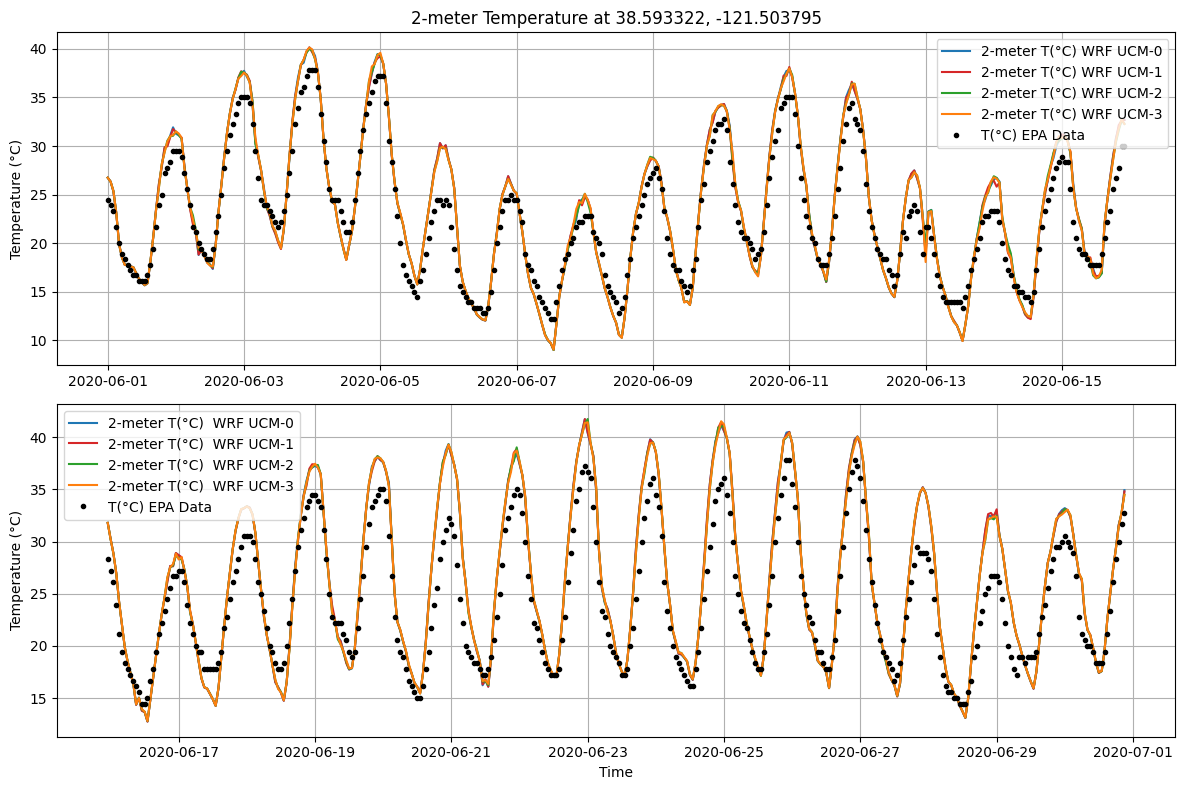

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Top subplot (first half)
axs[0].plot(times[0:359], t2_all_UCM0[0:359], label="2-meter T(°C) WRF UCM-0", color='tab:blue')
axs[0].plot(times[0:359], t2_all_UCM1[0:359], label="2-meter T(°C) WRF UCM-1", color='tab:red')
axs[0].plot(times[0:359], t2_all_UCM2[0:359], label="2-meter T(°C) WRF UCM-2", color='tab:green')
axs[0].plot(times[0:359], t2_all_UCM3[0:359], label="2-meter T(°C) WRF UCM-3", color='tab:orange')
axs[0].plot(times[0:359], TempC[0:359], '.k', label="T(°C) EPA Data")
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_title("2-meter Temperature at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(times[359:718], t2_all_UCM0[359:718], label="2-meter T(°C)  WRF UCM-0", color='tab:blue')
axs[1].plot(times[359:718], t2_all_UCM1[359:718], label="2-meter T(°C)  WRF UCM-1", color='tab:red')
axs[1].plot(times[359:718], t2_all_UCM2[359:718], label="2-meter T(°C)  WRF UCM-2", color='tab:green')
axs[1].plot(times[359:718], t2_all_UCM3[359:718], label="2-meter T(°C)  WRF UCM-3", color='tab:orange')
axs[1].plot(times[359:718], TempC[359:718], '.k', label="T(°C) EPA Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature (°C)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()